In [1]:
#%pip install cartopy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


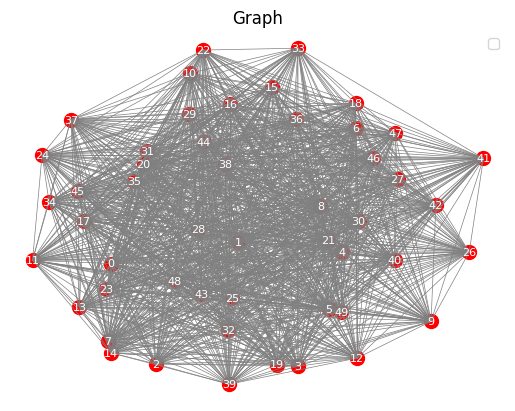

In [2]:
import numpy as np
import random
from Graphs.RandomGraph import RandomGraph
from Graphs.MapGraph import MapGraph
random.seed(0)
np,random.seed(0)

graph = RandomGraph(node_number=50,min_weight=1,max_weight=100)
        
# cities = [
#     "Boos", "Rouen", "Franqueville-Saint-Pierre", "Le Mesnil-Esnard", "Saint-Etienne-Du-Rouvray",
#     "Montmain", "Bois-Guillaume", "Bonsecours", "Sotteville-lès-Rouen", "Mont-Saint-Aignan",
#     "Le Grand-Quevilly", "Le Petit-Quevilly", "Canteleu", "Déville-lès-Rouen", "Darnétal",
#     "Elbeuf", "Oissel", "Maromme", "Cléon", "Saint-Aubin-lès-Elbeuf", "Saint-Aubin-Celloville",
#     "Saint-Martin-du-Vivier", "Saint-Jacques-sur-Darnétal", "Saint-Léger-du-Bourg-Denis",
#     "Saint-Pierre-de-Manneville", "Saint-Pierre-de-Varengeville", "Saint-Martin-de-Boscherville",
#     "Saint-Aubin-Épinay", "Saint-Paër", "Isneauville", "Hénouville", "Houppeville", "Malaunay",
#     "Jumièges", "La Bouille", "Duclair", "Notre-Dame-de-Bondeville", "Petit-Couronne"
# ]
#cities = ["Rouen", "Saint-Etienne-Du-Rouvray","Mont-Saint-Aignan", "Bonsecours"]

# cities = ["Bouffry","Yermenonville","Valennes","Mondoubleau","Arquenay", "Nantes", "Boos", "La Rochelle", "Bordeaux", "Toulouse", "Montpellier", "Marseille", "Lyon", "Le Mans", "Riom","Bergerac","Vic-sur-Cère", "Clermont-Ferrand","Sucé-sur-Erdre", "Rezé","Rieux"]
#cities = ["Marseille", "Rouen", "Lille", "Quimper", "Colmar", "Paris", "Bayonne", "Toulouse"]
#create real graph
#graph = MapGraph(cities=cities,start_city="Rouen")

graph.plot_graph()

Removed 235 edges of 1225
Costed 198 edges of 990


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


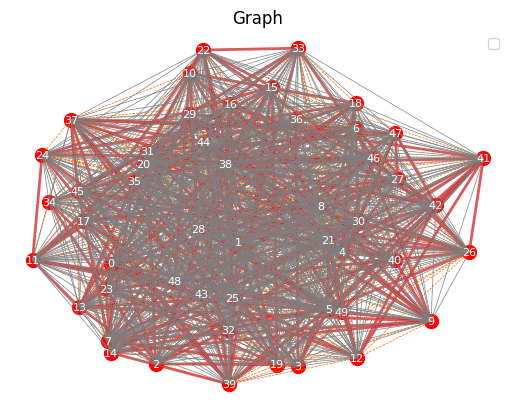

In [3]:
#Filtration
graph.apply_edge_blocking(percentage=20)
graph.apply_edge_costly(percentage=20)

graph.plot_graph()

Algorithm ACO : 



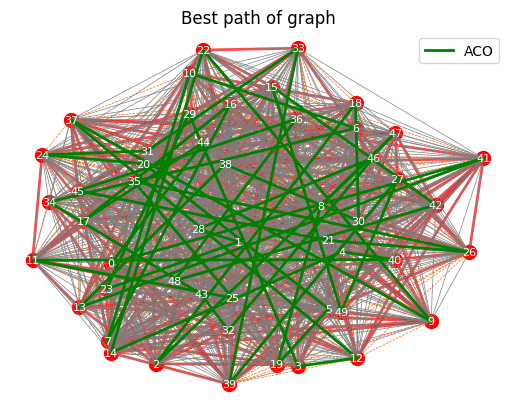

Execution time : 10.911458015441895
Best paths: [[0, 41, 13, 38, 30, 18, 2, 47, 8, 19, 5, 20, 24, 31, 33, 39, 27, 49, 15, 42, 48, 36, 45, 21, 26, 35, 25, 11, 40, 4, 14, 22, 9, 37, 12, 3, 29, 23, 1, 28, 46, 32, 43, 34, 6, 10, 7, 16, 17, 44, 0]]
Total distance: 321.45078236895483
Distance per vehicles  : [321.45078236895483]
Average distance for each vehicles : 321.45078236895483
Standard deviation distance for each vehicles : 0.0
Number of iterations needed to find the solution : 6
Total number of iterations : 16
Algorithm GREEDY : 



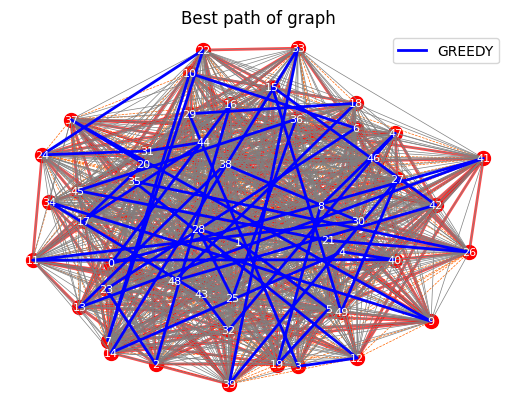

Execution time : 0.009866952896118164
Best paths: [[0, 41, 13, 38, 30, 11, 40, 4, 14, 33, 39, 27, 49, 15, 42, 48, 18, 29, 3, 12, 35, 26, 21, 45, 36, 25, 28, 1, 5, 19, 8, 47, 46, 32, 43, 34, 9, 37, 20, 17, 44, 31, 24, 22, 7, 10, 6, 23, 2, 16, 0]]
Total distance: 630.8122189299781
Distance per vehicles  : [630.8122189299781]
Average distance for each vehicles : 630.8122189299781
Standard deviation distance for each vehicles : 0.0
Number of iterations needed to find the solution : 1
Total number of iterations : 11


Exception: No valid path found after max iterations

In [ ]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Algorithms.Greedy.GreedyAlgo import GreedyAlgo
from Algorithms.Tabu.TabuAlgo import TabuAlgo
from utils.plot import Plot

def run_algorithm(graph,algorithm):
    algorithm.run()
    print(f"Algorithm {algorithm.name} : \n")
    vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
    current_path_results = {}
    current_path_results[algorithm.name] = vehicles_paths
    algorithms_path_results[algorithm.name] = current_path_results[algorithm.name]
    algorithms_distance_results[algorithm.name] = algorithm.distance_history
    # Print the best path found and the total distance
    graph.plot_graph(current_path_results)
    print(f"Execution time : {algorithm.execution_time} s ({algorithm.execution_time * 1000} ms)")
    print(f"Best paths: {algorithm.paths}")
    print(f"Total distance: { algorithm.distance}")
    print(f"Distance per vehicles  : {algorithm.distance_per_vehicles}")
    print(f"Average distance for each vehicles : {algorithm.distance_average_per_vehicles}")
    print(f"Standard deviation distance for each vehicles : {algorithm.distance_standard_deviation_per_vehicles}")
    print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
    print(f"Total number of iterations : {algorithm.total_interations_realized}")
    

def run_algorithms(graph, algorithms):
    for algorithm in algorithms:
        run_algorithm(graph,algorithm)
    Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)
    graph.plot_graph(algorithms_path_results)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 0
max_iterations = 100
convergence_threshold = 10
num_vehicles = 1
ACO = AcoAlgo(graph,"ACO",num_vehicles,200,0.5,1,2,min_iterations,max_iterations,convergence_threshold)
GREEDY = GreedyAlgo(graph,"GREEDY",num_vehicles,min_iterations,max_iterations,convergence_threshold)
TABU = TabuAlgo(graph,"TABU",num_vehicles,10,min_iterations,max_iterations,convergence_threshold)
algorithms = [ACO,GREEDY,TABU]
run_algorithms(graph= graph,algorithms=algorithms)
